In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Load data

In [71]:
df=pd.read_excel('HAR.xlsx')

In [72]:
#df_test_1=pd.read_csv('gyro_front.csv')


In [73]:
df.head()

,timeElapsed,x,y,z,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,0,0.588424,1.205167,1.132969,walk,NaN,NaN,NaN,NaN,NaN
1,1,0.396111,0.511939,1.530049,walk,NaN,NaN,NaN,NaN,NaN
2,2,-0.308842,0.586407,0.197176,walk,NaN,NaN,NaN,NaN,NaN
3,3,-1.323040,-0.554201,-1.667188,walk,NaN,NaN,NaN,NaN,NaN
4,4,-1.645321,-0.824351,-1.914050,walk,NaN,NaN,NaN,NaN,NaN


In [74]:
df.columns

Index(['timeElapsed', 'x', 'y', 'z', 'label', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [75]:
df.drop(columns=['Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],inplace=True)

In [76]:
df.shape

(13007, 5)

## Plot Axies of Accelerometer Dataset 

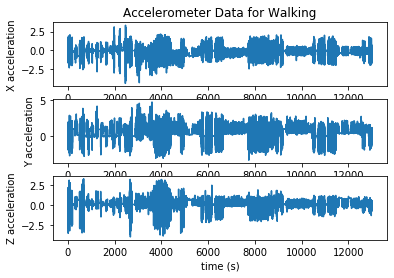

<Figure size 720x720 with 0 Axes>

In [77]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

In [78]:
X_acc= df['x'].values
Y_acc= df['y'].values
Z_acc= df['z'].values

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [79]:
def Filter (Data):
        a=0.6  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [80]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

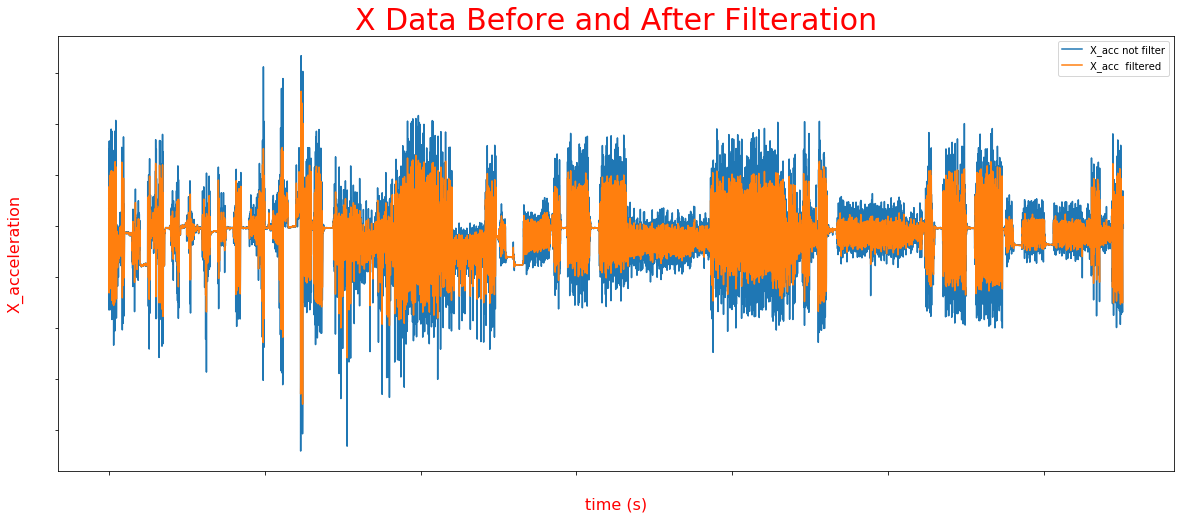

In [81]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('X_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


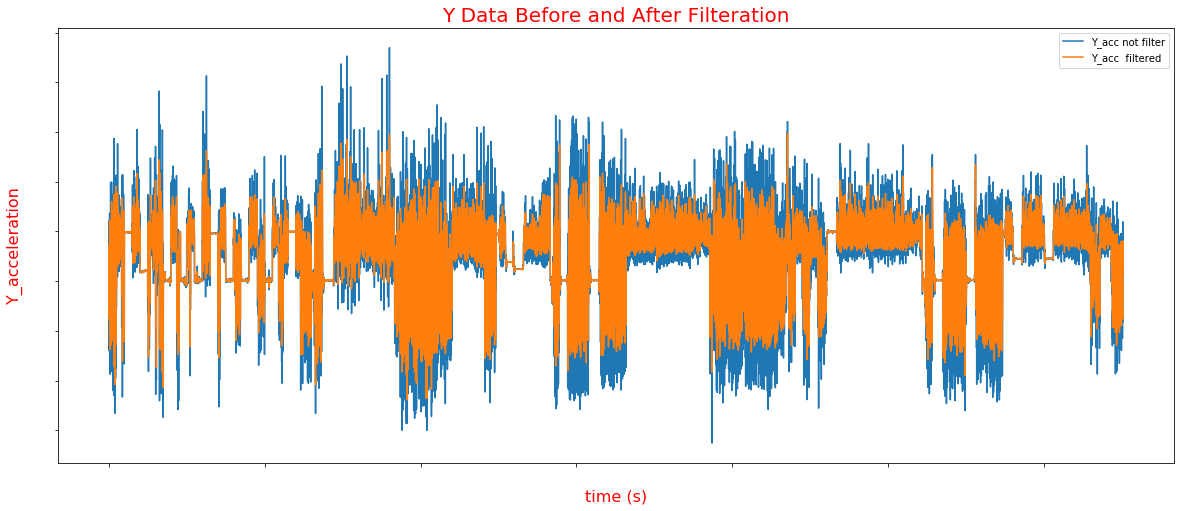

In [82]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='red',fontsize=20)
plt.ylabel('Y_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

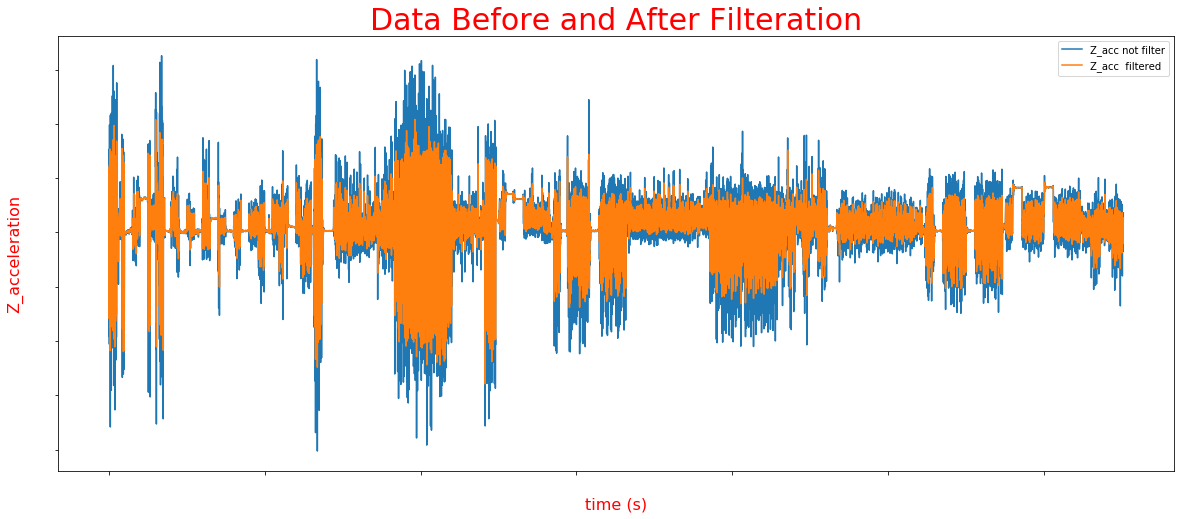

In [83]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('Z_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [84]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 4)
Y_smoothed = gaussian_filter1d(Y_filtered, 4)
Z_smoothed = gaussian_filter1d(Z_filtered, 4)


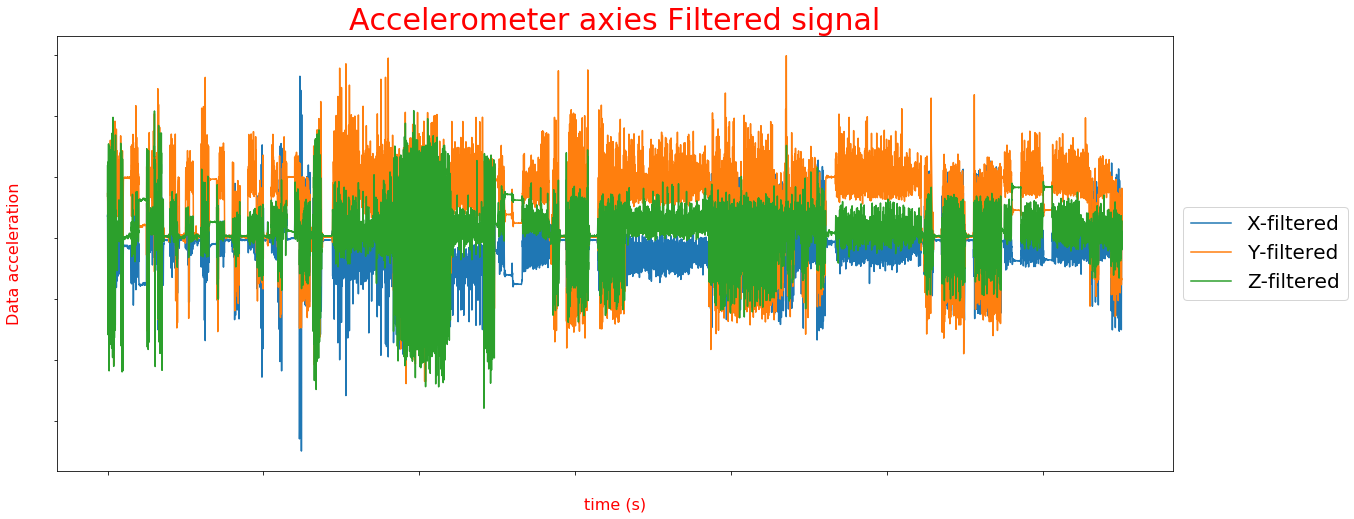

In [85]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

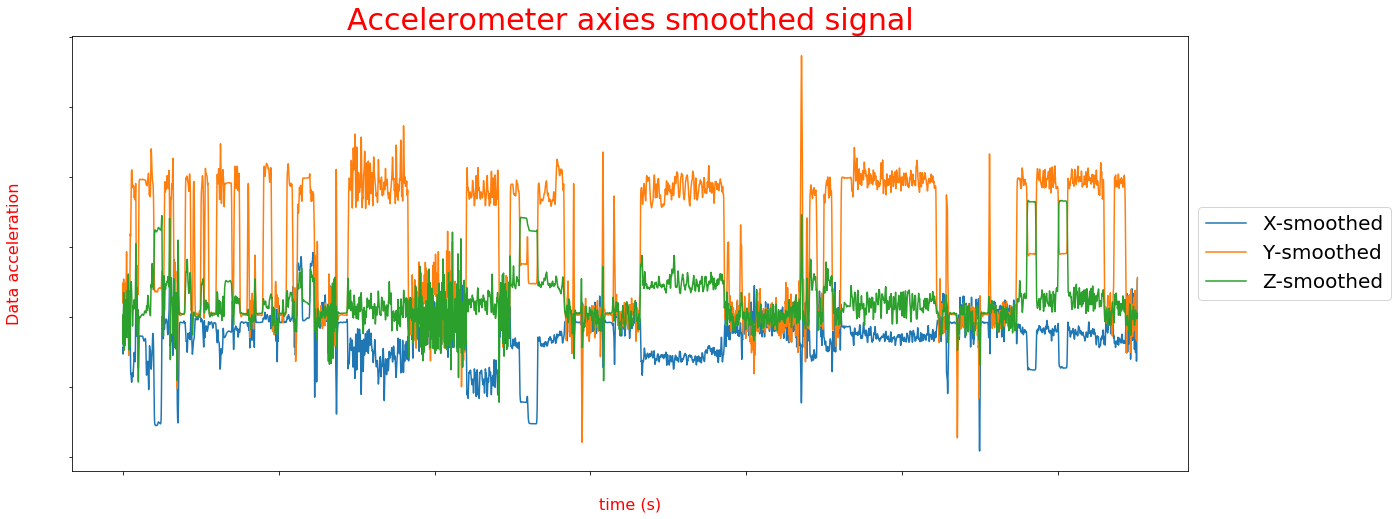

In [86]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

## Applying FD,XYZ & Searching for Strides

In [87]:
df_XYZ=df['x']*df['x']+df['y']*df['y']+df['z']*df['z']
XYZ=df_XYZ.apply(np.sqrt)

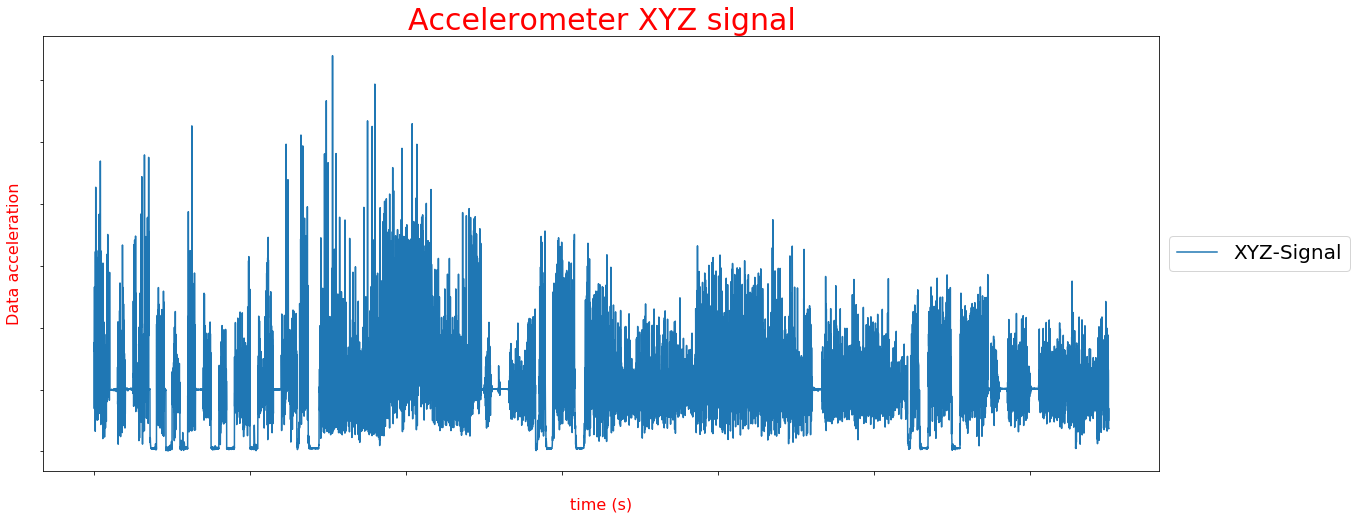

In [88]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ-Signal')

plt.title('Accelerometer XYZ signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

In [89]:

XYZ_smoothed=X_smoothed**2+Y_smoothed**2+Z_smoothed**2

In [90]:
xyz_smoothed=pd.DataFrame(XYZ_smoothed)

In [91]:
xyz_smoothed=xyz_smoothed.apply(np.sqrt)

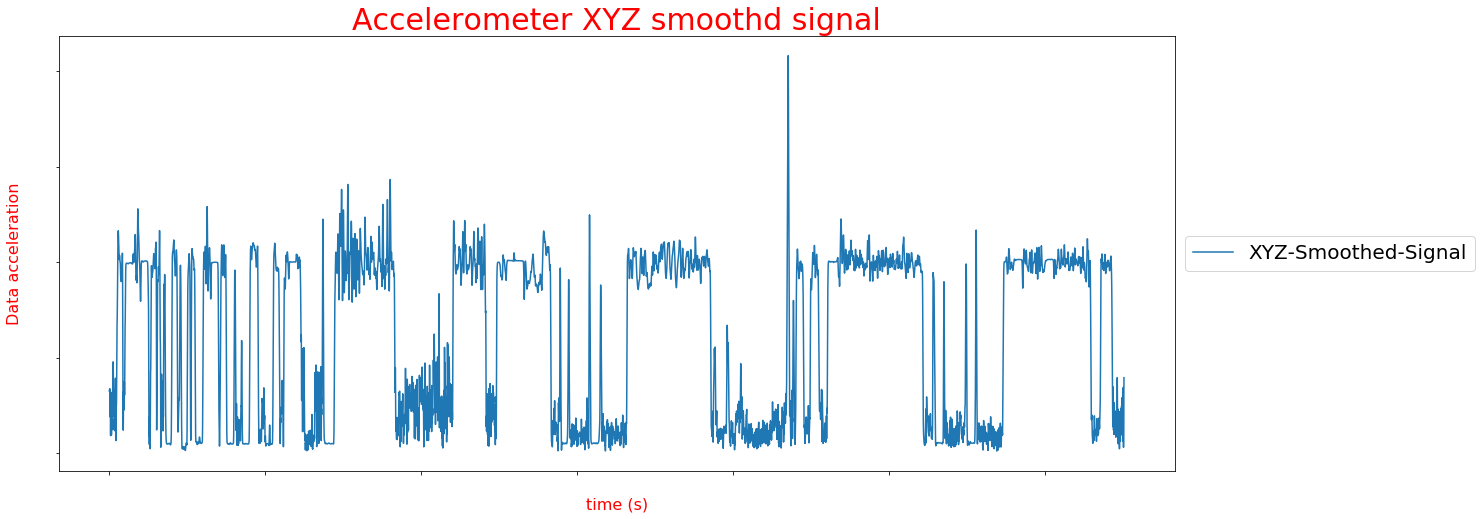

In [92]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],xyz_smoothed,label='XYZ-Smoothed-Signal')

plt.title('Accelerometer XYZ smoothd signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

## SET Peak And Valley for signal data & Perfom Segmentation 

In [93]:
peak=xyz_smoothed.values.flatten()

In [94]:
peak.shape

(13007,)

In [95]:
inv_peak=peak*-1 

Get Inverse of peak to find Valley 


In [96]:
from scipy.signal import find_peaks,peak_widths,find_peaks_cwt
peak_x, _ = find_peaks(peak)  ##Detect Peaks
valley, _ = find_peaks(inv_peak) ##detect valley

In [97]:
peak_x

array([    4,    11,    18,    29,    36,    48,    58,    64,    71,
          77,    83,    89,   113,   130,   152,   166,   181,   191,
         226,   256,   270,   278,   305,   331,   346,   365,   418,
         445,   466,   478,   509,   515,   520,   540,   568,   592,
         598,   610,   620,   629,   643,   662,   668,   678,   684,
         691,   699,   709,   743,   759,   773,   810,   826,   858,
         893,   911,   942,   960,   972,   986,  1022,  1060,  1070,
        1078,  1091,  1114,  1137,  1155,  1212,  1231,  1253,  1283,
        1315,  1345,  1363,  1386,  1441,  1468,  1490,  1531,  1551,
        1574,  1610,  1630,  1637,  1643,  1654,  1661,  1665,  1671,
        1677,  1688,  1696,  1726,  1755,  1770,  1813,  1844,  1871,
        1900,  1922,  1934,  1942,  1959,  1965,  1981,  1992,  2000,
        2025,  2039,  2055,  2073,  2083,  2121,  2155,  2167,  2196,
        2202,  2209,  2217,  2226,  2246,  2267,  2282,  2314,  2329,
        2343,  2359,

In [98]:
list_of_valley=list(valley)

In [99]:
len(list_of_valley)

873

In [100]:
t=df['timeElapsed']

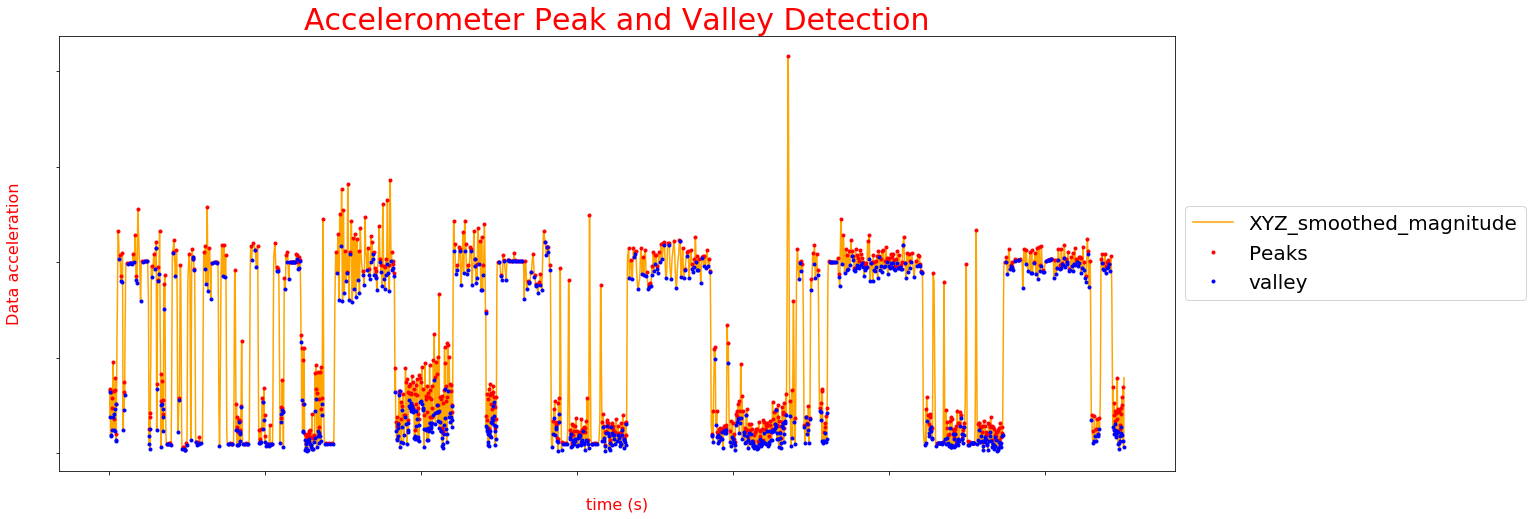

In [101]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],xyz_smoothed,label='XYZ_smoothed_magnitude',color='orange')
plt.plot(t[peak_x], peak[peak_x], 'r.',label='Peaks')
plt.plot(t[valley], peak[valley], 'b.',label='valley')

plt.title('Accelerometer Peak and Valley Detection',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

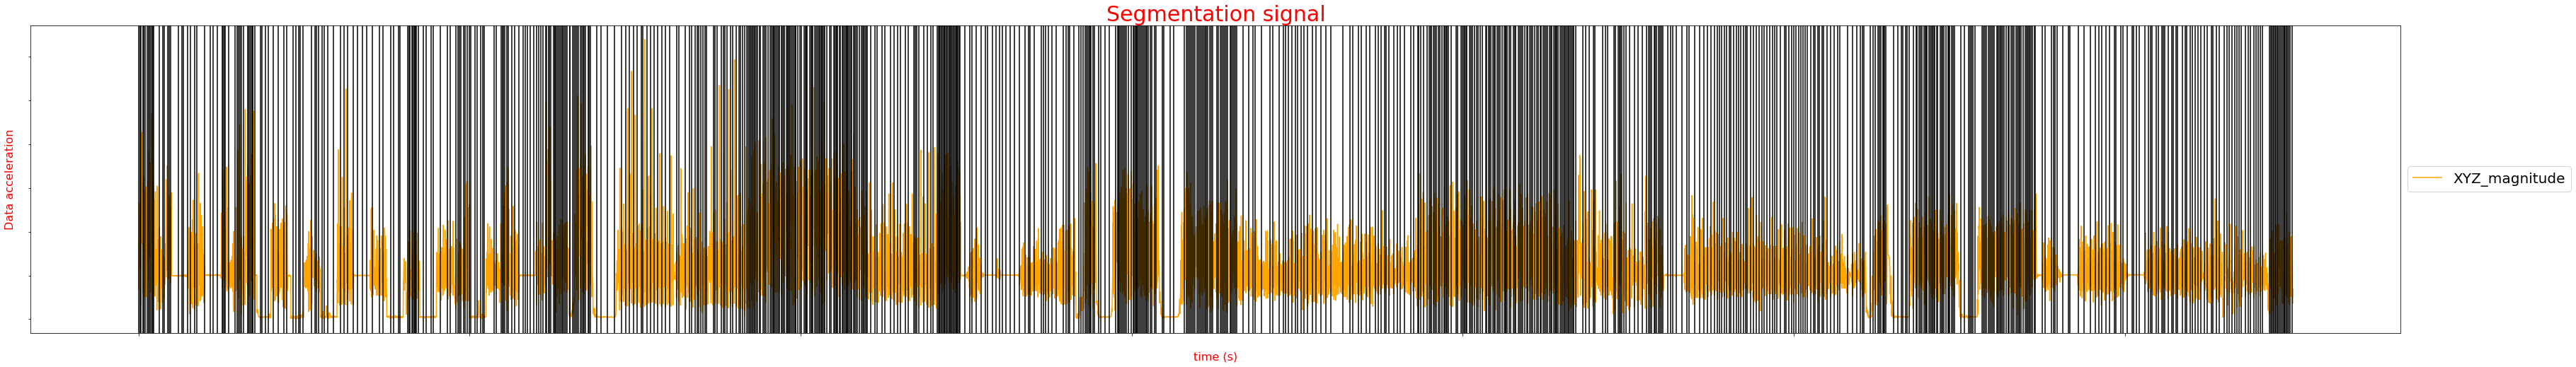

In [102]:
plt.figure(figsize=(60,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ_magnitude',color='orange')
for i in list_of_valley:
    plt.axvline(t[i],color='black')
plt.title('Segmentation signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

Calculate The Hight of each wave

In [103]:
hight_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        hight_xyz.append(max(XYZ[0:list_of_valley[0]])-min(XYZ[0:list_of_valley[0]]))
    else:
        hight_xyz.append(max(XYZ[list_of_valley[i-1]:list_of_valley[i]])-min(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
hight_xyz

[0.09430955225097426,
 1.9637521263471762,
 2.058743012074403,
 2.642609716596499,
 2.533293414766738,
 2.7377360612295574,
 2.5097321910337502,
 1.9681847145137068,
 2.9345765204592715,
 2.1364907496234355,
 4.074588081368811,
 0.4922511797030824,
 2.801904602108347,
 2.832395022143431,
 1.6574943405459008,
 0.966666190010254,
 2.7030383741702324,
 1.6431763794583807,
 1.9498283898350284,
 2.06392701427891,
 0.02407593015461007,
 0.014090658451513915,
 0.04799474602369569,
 1.9748332495713603,
 2.4796446983004845,
 1.629885818683372,
 3.0269307984022644,
 0.4183396606746981,
 0.03225780033275483,
 0.025760213367058915,
 1.6957902059820216,
 2.2246995827192153,
 1.3555726471168703,
 2.5264762238990777,
 2.832716297407106,
 1.8293420201880073,
 1.9113899527352012,
 3.3637248697601163,
 1.710324622573712,
 4.317079891706109,
 1.388580329341677,
 4.45025374374619,
 2.272473338680263,
 2.5751366575477617,
 2.3993053870797976,
 2.899354511241532,
 2.598111473356442,
 4.294607694707432,
 0.9

Calculate the Mean of every wave

In [104]:
import statistics
mean_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        mean_xyz.append(statistics.mean(XYZ[0:list_of_valley[0]]))
    else:
        mean_xyz.append(statistics.mean(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
mean_xyz

[1.708490152883771,
 1.9420686700467722,
 1.7671920891937976,
 2.392045202798014,
 2.111372424979095,
 2.0872558118347087,
 2.174619985851023,
 1.9479097512551125,
 2.4993299380668628,
 2.6265585075918088,
 2.4198475342378045,
 2.1994281995320777,
 1.9072229393262443,
 1.4758837157858555,
 1.0204574063352416,
 0.9688287536909188,
 1.6803345534786065,
 1.6415985563918007,
 2.1223559280155193,
 1.122781619352753,
 0.9949386528700638,
 0.9983155485139108,
 0.9948211788536863,
 1.0787550948808948,
 1.0997479954776965,
 1.018441863599309,
 1.1515037912821888,
 0.993257313466258,
 1.003965821090272,
 1.00667910948287,
 1.0829650102181276,
 2.4291353321957523,
 1.7319717518417457,
 1.8745489568989997,
 1.2662312132043052,
 1.0372012701382363,
 1.1354303197384836,
 1.5643224093151569,
 2.3670181334156837,
 1.7541548392800004,
 1.1200828363784172,
 1.7413505018627284,
 2.3319008801090284,
 2.3305691170141385,
 2.1069513804000692,
 2.5575262451238494,
 2.6447958365804873,
 1.9555149569086547,
 0

Calculating the width of each wave

In [105]:
width_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        width_xyz.append(t[list_of_valley[i]]-t[0])
    else:
        width_xyz.append(t[list_of_valley[i]]-t[list_of_valley[i-1]])
width_xyz

[2,
 6,
 7,
 11,
 6,
 8,
 15,
 7,
 5,
 6,
 8,
 4,
 5,
 35,
 22,
 10,
 20,
 8,
 9,
 45,
 23,
 10,
 24,
 16,
 29,
 11,
 47,
 33,
 18,
 26,
 32,
 4,
 5,
 6,
 23,
 37,
 11,
 12,
 5,
 11,
 12,
 25,
 5,
 10,
 8,
 6,
 4,
 11,
 35,
 9,
 19,
 18,
 29,
 33,
 33,
 17,
 38,
 17,
 19,
 5,
 18,
 51,
 24,
 9,
 11,
 22,
 14,
 21,
 32,
 43,
 21,
 24,
 34,
 23,
 30,
 28,
 32,
 43,
 24,
 44,
 16,
 33,
 6,
 48,
 8,
 5,
 12,
 6,
 6,
 6,
 4,
 7,
 9,
 30,
 17,
 30,
 13,
 44,
 44,
 17,
 34,
 12,
 7,
 12,
 15,
 8,
 15,
 10,
 9,
 29,
 11,
 19,
 13,
 10,
 60,
 14,
 28,
 8,
 8,
 5,
 14,
 7,
 22,
 19,
 27,
 22,
 15,
 13,
 18,
 19,
 18,
 13,
 11,
 13,
 17,
 7,
 12,
 5,
 8,
 16,
 7,
 4,
 7,
 9,
 6,
 9,
 10,
 4,
 7,
 10,
 9,
 16,
 3,
 13,
 10,
 10,
 6,
 12,
 11,
 10,
 6,
 7,
 9,
 15,
 5,
 6,
 42,
 23,
 41,
 40,
 46,
 24,
 22,
 24,
 23,
 24,
 9,
 25,
 21,
 23,
 23,
 23,
 24,
 22,
 43,
 16,
 39,
 24,
 14,
 19,
 15,
 9,
 13,
 10,
 12,
 9,
 42,
 12,
 12,
 23,
 13,
 12,
 11,
 23,
 12,
 23,
 14,
 10,
 13,
 14,
 10,
 10,
 8

Calculating The standered deviassion of each wave

In [106]:
import statistics
std_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        std_xyz.append(statistics.stdev(XYZ[0:list_of_valley[0]]))
    else:
        std_xyz.append(statistics.stdev(XYZ[list_of_valley[i-1]:list_of_valley[i]]))
std_xyz

[0.06668692392733093,
 0.6992104030550043,
 0.7544331192467323,
 0.7666412560073947,
 0.9162518688467749,
 0.8342932111734975,
 0.6747124389462762,
 0.6995325816357753,
 1.0778183711545393,
 0.8240141639984198,
 1.3004247114445056,
 0.26511063390908185,
 1.0255290098204264,
 0.8680297759255029,
 0.41668102535146695,
 0.3114914662162488,
 0.8744266664491694,
 0.6401431673960531,
 0.6446579756689094,
 0.44478842328435503,
 0.006431696818189259,
 0.00419765710445657,
 0.010796156866259177,
 0.510096835866722,
 0.6042526025021716,
 0.4694934799983659,
 0.5996083913540146,
 0.06947891993470112,
 0.007113928409861768,
 0.006016763687162325,
 0.3099902156512785,
 0.9399132809522568,
 0.5804622981661891,
 1.0215053266998622,
 0.6906735018573703,
 0.4115779878931144,
 0.5404473907942502,
 1.1546776016037068,
 0.6465654529180672,
 1.2125650391426746,
 0.4355587841800369,
 1.0504935309199612,
 0.8655634835076668,
 0.8272289219784119,
 0.7361088653807076,
 1.053463473540815,
 1.1360949821454858,
 

In [107]:
list_of_valley

[2,
 8,
 15,
 26,
 32,
 40,
 55,
 62,
 67,
 73,
 81,
 85,
 90,
 125,
 147,
 157,
 177,
 185,
 194,
 239,
 262,
 272,
 296,
 312,
 341,
 352,
 399,
 432,
 450,
 476,
 508,
 512,
 517,
 523,
 546,
 583,
 594,
 606,
 611,
 622,
 634,
 659,
 664,
 674,
 682,
 688,
 692,
 703,
 738,
 747,
 766,
 784,
 813,
 846,
 879,
 896,
 934,
 951,
 970,
 975,
 993,
 1044,
 1068,
 1077,
 1088,
 1110,
 1124,
 1145,
 1177,
 1220,
 1241,
 1265,
 1299,
 1322,
 1352,
 1380,
 1412,
 1455,
 1479,
 1523,
 1539,
 1572,
 1578,
 1626,
 1634,
 1639,
 1651,
 1657,
 1663,
 1669,
 1673,
 1680,
 1689,
 1719,
 1736,
 1766,
 1779,
 1823,
 1867,
 1884,
 1918,
 1930,
 1937,
 1949,
 1964,
 1972,
 1987,
 1997,
 2006,
 2035,
 2046,
 2065,
 2078,
 2088,
 2148,
 2162,
 2190,
 2198,
 2206,
 2211,
 2225,
 2232,
 2254,
 2273,
 2300,
 2322,
 2337,
 2350,
 2368,
 2387,
 2405,
 2418,
 2429,
 2442,
 2459,
 2466,
 2478,
 2483,
 2491,
 2507,
 2514,
 2518,
 2525,
 2534,
 2540,
 2549,
 2559,
 2563,
 2570,
 2580,
 2589,
 2605,
 2608,
 2621

In [108]:
df_feature=pd.DataFrame({'Acc_Mean':mean_xyz,
                        'Acc_STD':std_xyz
                        ,'peak_height':hight_xyz
                        ,'peak_width':width_xyz})

In [109]:
df_feature.shape

(873, 4)

In [110]:
list_of_label=[]

In [111]:
counter=0
for i in  list_of_valley:
    x=df['label'].loc[i]
    list_of_label.append(x)  

    

In [112]:
for i in range(0,len(list_of_valley)):
    print(str(i)+'------>'+str(list_of_valley[i])+'------>'+str(list_of_label[i]))

0------>2------>walk
1------>8------>walk
2------>15------>walk
3------>26------>walk
4------>32------>walk
5------>40------>walk
6------>55------>walk
7------>62------>walk
8------>67------>walk
9------>73------>walk
10------>81------>walk
11------>85------>walk
12------>90------>walk
13------>125------>stairUp
14------>147------>stairUp
15------>157------>stairUp
16------>177------>stairUp
17------>185------>stairUp
18------>194------>stairUp
19------>239------>stand
20------>262------>stand
21------>272------>stand
22------>296------>stand
23------>312------>stairDown
24------>341------>stairDown
25------>352------>stairDown
26------>399------>stairDown
27------>432------>sit
28------>450------>sit
29------>476------>sit
30------>508------>stairUp
31------>512------>stairUp
32------>517------>stairUp
33------>523------>stairUp
34------>546------>stairUp
35------>583------>stairUp
36------>594------>stairUp
37------>606------>walk
38------>611------>walk
39------>622------>walk
40---

In [113]:
df['label'].iloc[10577]

'sit'

In [114]:
i=10577
df.drop(10577,inplace=True)

In [115]:
df_feature['label']=list_of_label

In [116]:
df_feature.shape

(873, 5)

In [117]:
df_feature.head()

,Acc_Mean,Acc_STD,peak_height,peak_width,label
0,1.708490,0.066687,0.094310,2,walk
1,1.942069,0.699210,1.963752,6,walk
2,1.767192,0.754433,2.058743,7,walk
3,2.392045,0.766641,2.642610,11,walk
4,2.111372,0.916252,2.533293,6,walk


In [118]:
X=df_feature.drop(columns=['label']).values
y=df_feature['label']

In [119]:
X.shape

(873, 4)

In [120]:
y.shape

(873,)

# Classification Phase

### Splitting data to train and test

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=49)

In [122]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (698, 4)
X_test_shape ----> (175, 4)
Y_train_shape ----> (698,)
Y_test_shape ----> (175,)


### Preprocessimg label data and feature

In [123]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_labeled=le.fit_transform(y_train)
y_labeled_test=le.transform(y_test)
y_labeled.shape


(698,)

In [124]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_Scaler_train=sc.fit_transform(X_train)
x_Scaler_test=sc.transform(X_test)
x_Scaler_train.shape


(698, 4)

### Using Support vector machine Classification

Cross validation for train data is :  [0.66523605 0.66094421 0.66810345]
Cross validation for test data is :  [0.6779661  0.60344828 0.62068966]
Confusion matrix is :  [[11  0  0  0  0]
 [ 0  0  0  0 26]
 [ 0  0  0  0 32]
 [ 5  0  0  0  4]
 [ 0  0  0  0 97]]


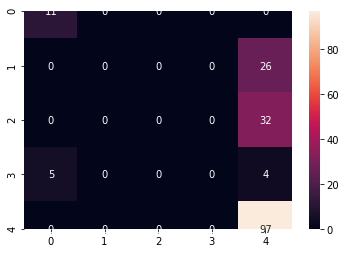

In [125]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf', random_state = 0)
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_svm_train)
cv_svm_test = cross_val_score(classifier_SVC , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_svm_test)
y_pred = classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)


In [126]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)


### Using KNN Classification

Cross validation for train data is :  [0.60085837 0.58798283 0.61637931]
Cross validation for test data is :  [0.50847458 0.56896552 0.53448276]
Confusion matrix is :  [[ 7  0  0  4  0]
 [ 0  9  5  0 12]
 [ 0  2 14  0 16]
 [ 1  2  0  4  2]
 [ 2  8 11  0 76]]


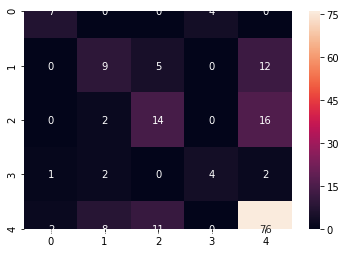

In [143]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 3)
classifier_KNN.fit(x_Scaler_train, y_labeled)
cv_knn_train = cross_val_score(classifier_KNN , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_knn_train)
cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_knn_test)
y_pred = classifier_KNN.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [144]:
y_pred_Knn = classifier_KNN.predict(x_Scaler_test)

### Using Random forest Classifier

Cross validation for train data is :  [0.69527897 0.67381974 0.65948276]
Cross validation for test data is :  [0.57627119 0.5        0.63793103]
Confusion matrix is :  [[10  0  0  0  1]
 [ 0 11  1  0 14]
 [ 0  2 14  0 16]
 [ 2  2  0  2  3]
 [ 2  4 12  0 79]]


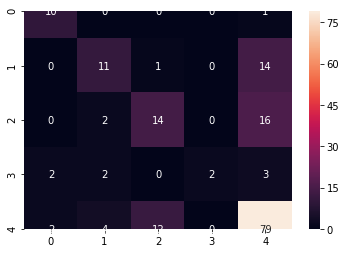

In [145]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 17, criterion = 'entropy', random_state = 0)
classifier_RF.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(classifier_RF , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_rf_train)
cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_rf_test)
y_pred = classifier_RF.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [146]:
y_pred_RF= classifier_RF.predict(x_Scaler_test)

### Using Decision Tree Classifier

Cross validation for train data is :  [0.63948498 0.69527897 0.5862069 ]
Cross validation for test data is :  [0.57627119 0.56896552 0.65517241]
Confusion matrix is :  [[11  0  0  0  0]
 [ 0  5  1  0 20]
 [ 0  1  3  0 28]
 [ 2  1  0  2  4]
 [ 1  2  8  0 86]]


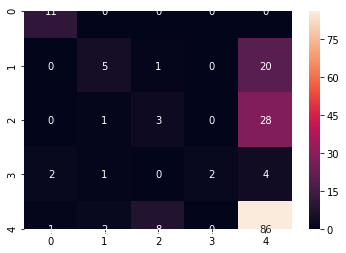

In [147]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier(max_depth = 5)
classifier_DT.fit(x_Scaler_train, y_labeled)
cv_dt_train = cross_val_score(classifier_DT , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_dt_train)
cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_dt_test)
y_pred = classifier_DT.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [148]:
y_pred_DT=classifier_DT.predict(x_Scaler_test)

### Using Navie Bayes Classifier

Cross validation for train data is :  [0.60944206 0.65236052 0.64655172]
Cross validation for test data is :  [0.50847458 0.60344828 0.5       ]
Confusion matrix is :  [[ 7  0  0  4  0]
 [ 0  4  0  0 22]
 [ 0  0  0  0 32]
 [ 2  1  0  3  3]
 [ 1  4  0  2 90]]


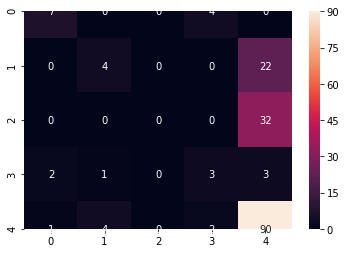

In [149]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_Scaler_train, y_labeled)
cv_nv_train = cross_val_score(classifier_NB , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data is : ", cv_nv_train)
cv_nv_test = cross_val_score(classifier_NB , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data is : ", cv_nv_test)
y_pred = classifier_NB.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred)
print("Confusion matrix is : ", cm)
ax = sns.heatmap(cm,annot=True)

In [150]:
y_pred_NB = classifier_NB.predict(x_Scaler_test)

### Showing Accuracy using accuracy_score

In [153]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',accuracy_score(y_labeled_test, y_pred_SVC))
print('Accuracy of Desicion Tree--------->',accuracy_score(y_labeled_test, y_pred_DT))
print('Accuracy of Random forest--------->',accuracy_score(y_labeled_test, y_pred_RF))
print('Accuracy of KNN          --------->',accuracy_score(y_labeled_test, y_pred_Knn))
print('Accuracy of Navie Bayes  --------->',accuracy_score(y_labeled_test, y_pred_NB))  

Accuracy of SVC          ---------> 0.6171428571428571
Accuracy of Desicion Tree---------> 0.6114285714285714
Accuracy of Random forest---------> 0.6628571428571428
Accuracy of KNN          ---------> 0.6285714285714286
Accuracy of Navie Bayes  ---------> 0.5942857142857143


In [152]:
y_prediction_test_SVC=classifier_SVC.predict(x_Scaler_train)
y_prediction_test_KNN=classifier_KNN.predict(x_Scaler_train)
y_prediction_test_RF=classifier_RF.predict(x_Scaler_train)
y_prediction_test_DT=classifier_DT.predict(x_Scaler_train)
y_prediction_test_NB=classifier_NB.predict(x_Scaler_train)


In [143]:
print('Accuracy of SVC          --------->',accuracy_score(y_labeled, y_prediction_test_SVC))
print('Accuracy of Desicion Tree--------->',accuracy_score(y_labeled, y_prediction_test_KNN))
print('Accuracy of Random forest--------->',accuracy_score(y_labeled, y_prediction_test_RF))
print('Accuracy of KNN          --------->',accuracy_score(y_labeled, y_prediction_test_DT))
print('Accuracy of Navie Bayes  --------->',accuracy_score(y_labeled, y_prediction_test_NB))  

Accuracy of SVC          ---------> 0.05555555555555555
Accuracy of Desicion Tree---------> 0.08641975308641975
Accuracy of Random forest---------> 0.08641975308641975
Accuracy of KNN          ---------> 0.06790123456790123
Accuracy of Navie Bayes  ---------> 0.10493827160493827


In [139]:
y_prediction_test_DT.shape

(151,)